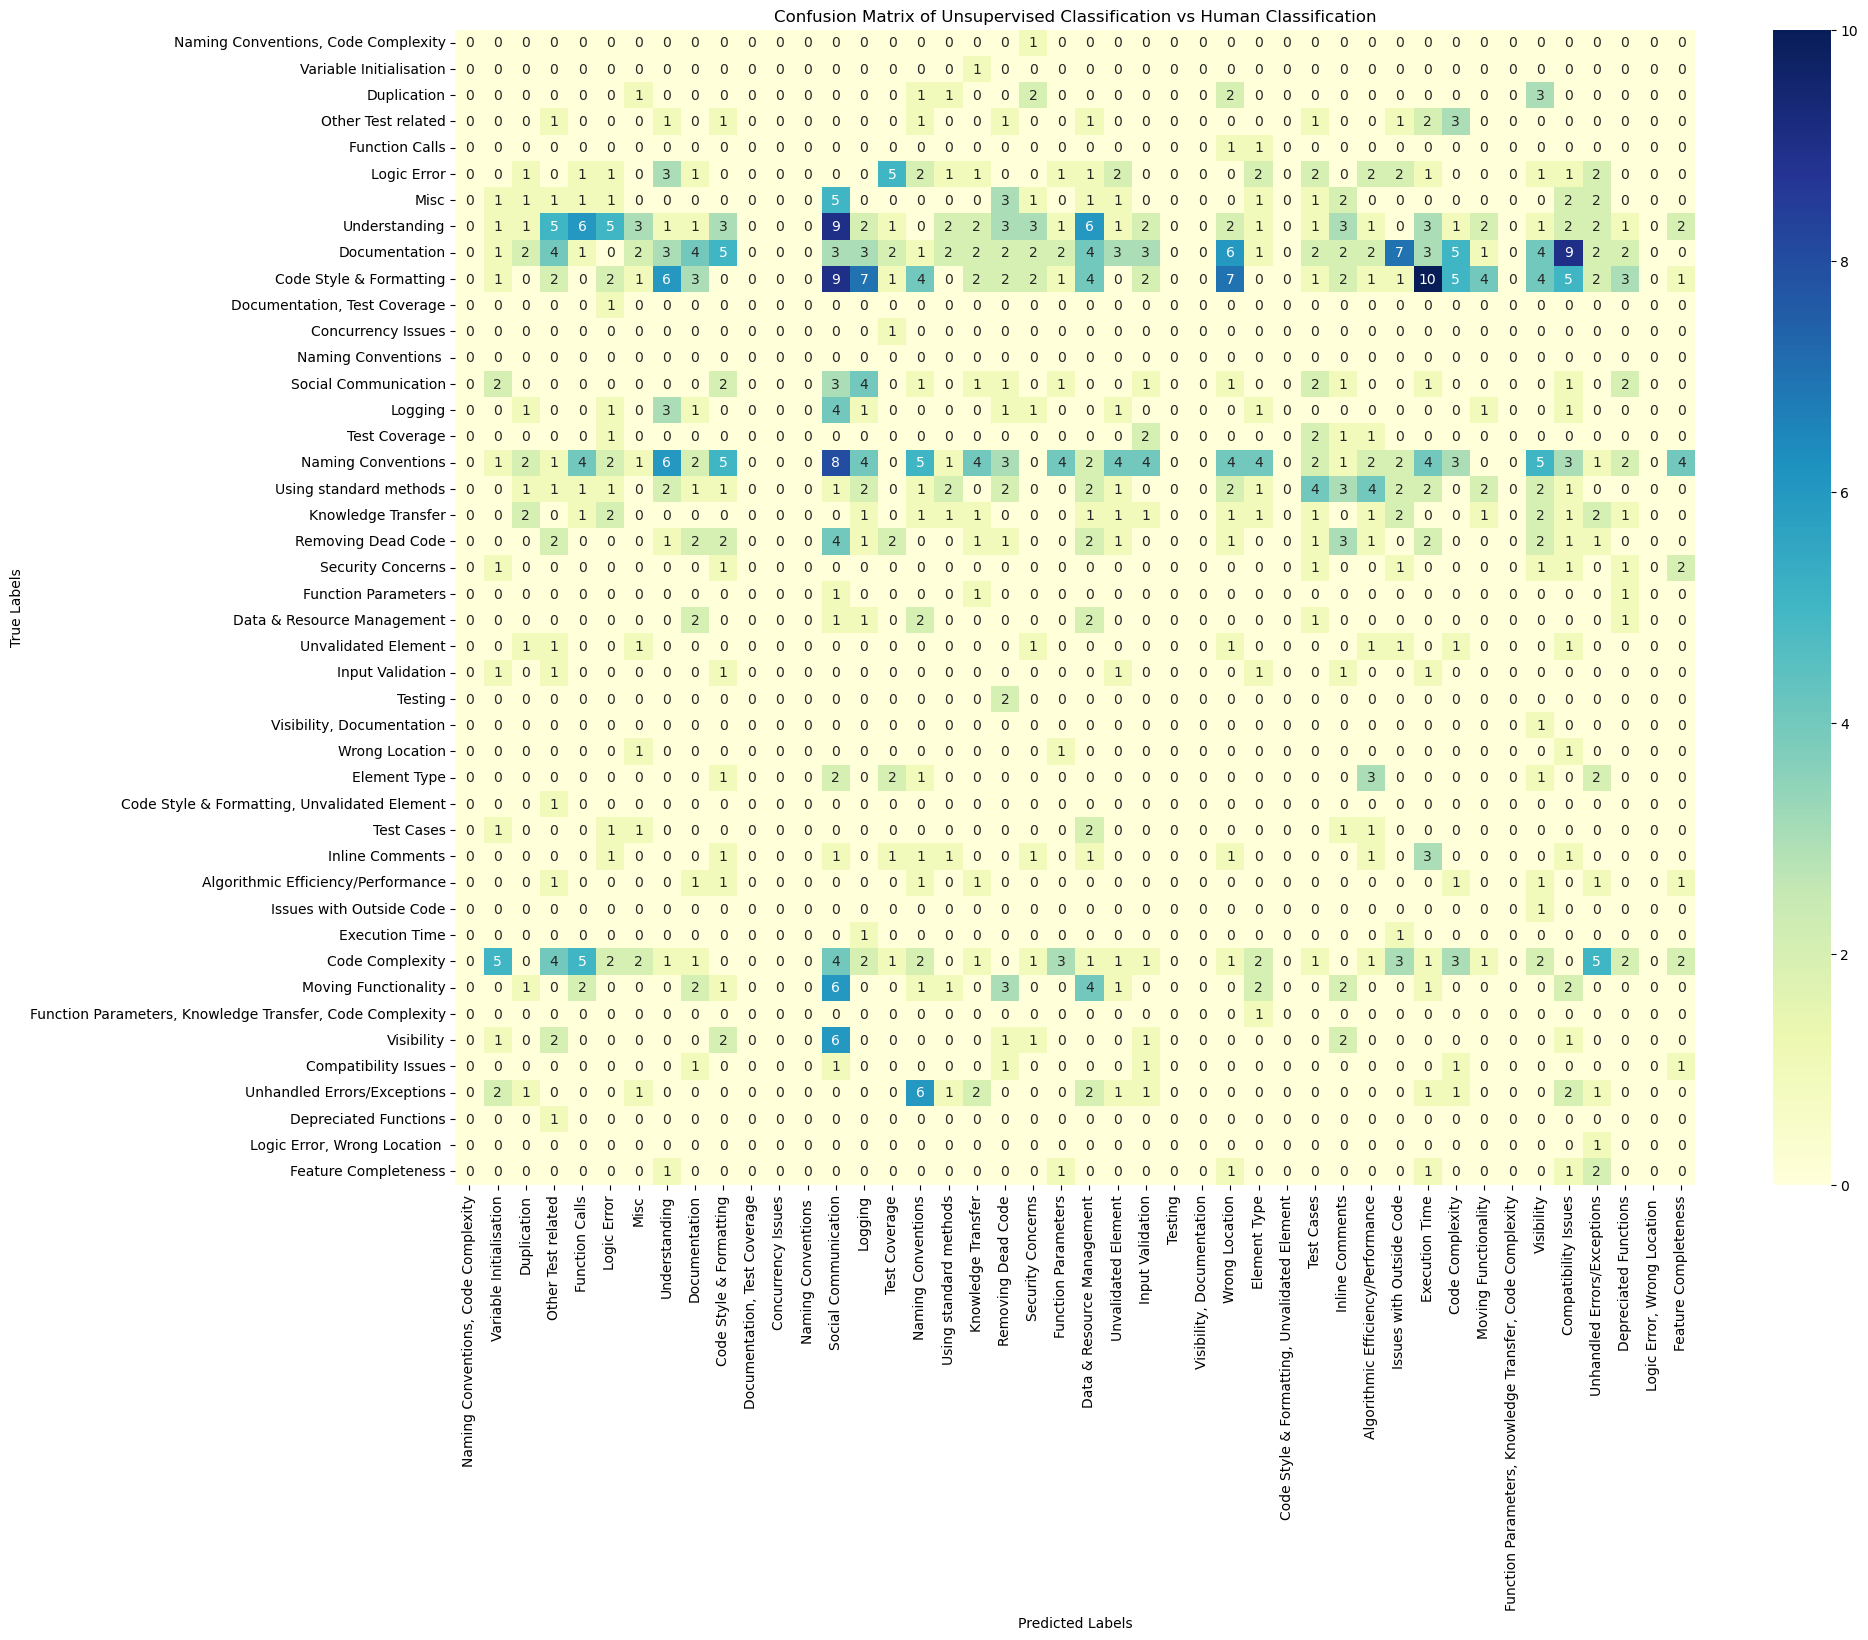

In [1]:
# Import necessary libraries
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
with open("HAO_comment_classification.json", "r") as file:
    human_classified_data = json.load(file)

with open("availability_comment_classification_with_topics.json", "r") as file:
    unsupervised_classified_data = json.load(file)

# Function to extract the category with the highest weight
def extract_top_category(classification):
    return max(classification, key=lambda x: x[1])[0]

# Prepare classification lists
human_classifications = [item['Comment Classification'] for item in human_classified_data]
unsupervised_classifications = [extract_top_category(item['Comment Classification']) for item in unsupervised_classified_data]

# Compute confusion matrix
confusion_mat = confusion_matrix(human_classifications, unsupervised_classifications, labels=list(set(human_classifications)))

# Create a DataFrame of the confusion matrix
confusion_df = pd.DataFrame(confusion_mat, index=list(set(human_classifications)), columns=list(set(human_classifications)))

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(confusion_df, annot=True, cmap="YlGnBu")
plt.title('Confusion Matrix of Unsupervised Classification vs Human Classification')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Total number of comments: 904
Number of common classifications: 35
Number of unique human classifications: 9
Number of unique unsupervised classifications: 3
Accuracy of availability_comment_classification_with_topics.json: 3.87%


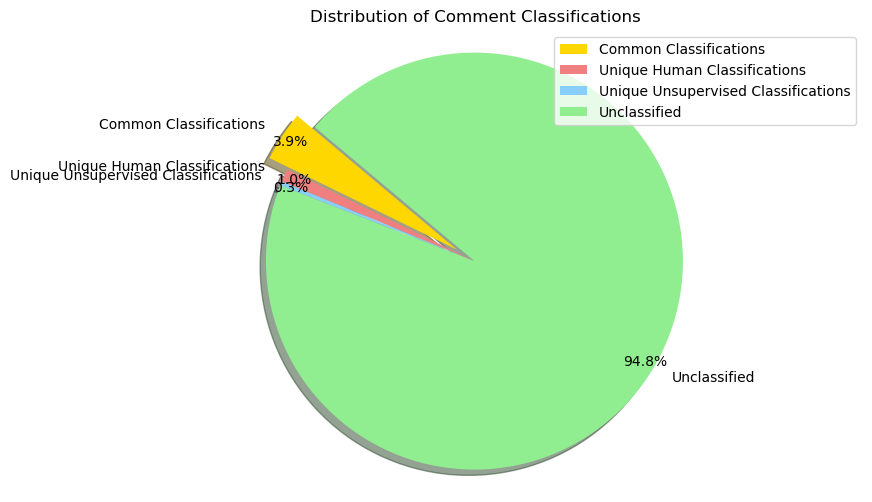

In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare classification lists
human_classifications = [item['Comment Classification'] for item in human_classified_data]
unsupervised_classifications = [extract_top_category(item['Comment Classification']) for item in unsupervised_classified_data]

# Total number of comments
total_comments = 904

# Extract unique comment classifications
human_unique_classifications = set(human_classifications)
unsupervised_unique_classifications = set(unsupervised_classifications)

# Find common and unique classifications
common_classifications = human_unique_classifications.intersection(unsupervised_unique_classifications)
unique_human_classifications = human_unique_classifications.difference(unsupervised_unique_classifications)
unique_unsupervised_classifications = unsupervised_unique_classifications.difference(human_unique_classifications)

# Accuracy calculation
correctly_classified = len(common_classifications)
accuracy = correctly_classified / total_comments * 100


# Print the results
print(f"Total number of comments: {total_comments}")
print(f"Number of common classifications: {len(common_classifications)}")
print(f"Number of unique human classifications: {len(unique_human_classifications)}")
print(f"Number of unique unsupervised classifications: {len(unique_unsupervised_classifications)}")
print(f"Accuracy of availability_comment_classification_with_topics.json: {accuracy:.2f}%")

# Values for pie chart
metrics = ['Common Classifications', 'Unique Human Classifications', 'Unique Unsupervised Classifications', 'Unclassified']
values = [len(common_classifications), len(unique_human_classifications), len(unique_unsupervised_classifications), total_comments - (len(common_classifications) + len(unique_human_classifications) + len(unique_unsupervised_classifications))]
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']
explode = (0.1, 0, 0, 0)  # Explode the first slice

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(values, explode=explode, labels=metrics, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, pctdistance=0.95)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Comment Classifications')
plt.legend(loc="best")
plt.show()


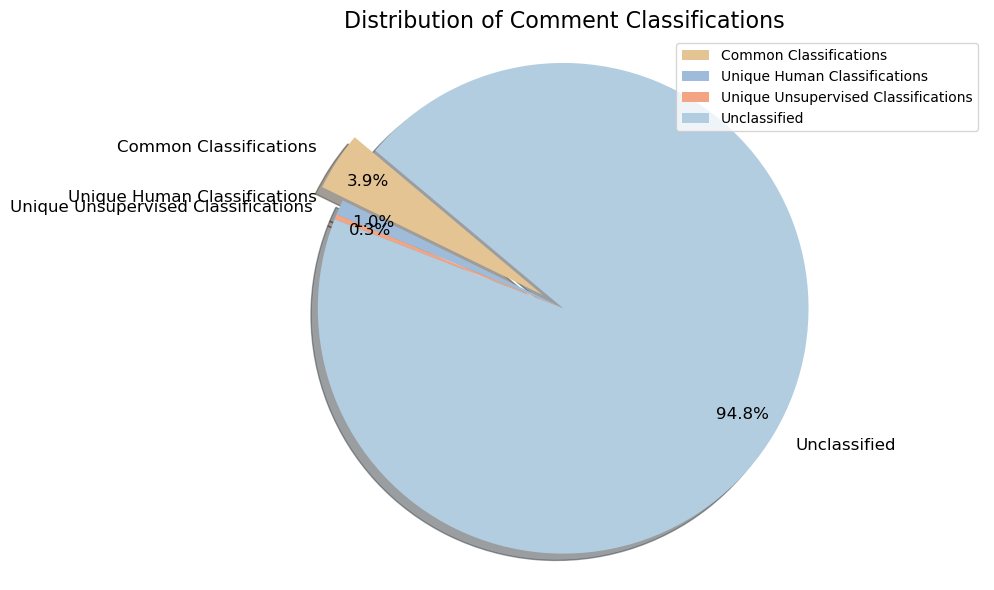

In [9]:
# Import necessary libraries
import json
import matplotlib.pyplot as plt

# Load the datasets
with open("HAO_comment_classification.json", "r") as file:
    human_classified_data = json.load(file)

with open("availability_comment_classification_with_topics.json", "r") as file:
    unsupervised_classified_data = json.load(file)

# Function to extract the category with the highest weight
def extract_top_category(classification):
    return max(classification, key=lambda x: x[1])[0]

# Prepare classification lists
human_classifications = [item['Comment Classification'] for item in human_classified_data]
unsupervised_classifications = [extract_top_category(item['Comment Classification']) for item in unsupervised_classified_data]

# Extract unique comment classifications
human_unique_classifications = set(human_classifications)
unsupervised_unique_classifications = set(unsupervised_classifications)

# Find common and unique classifications
common_classifications = human_unique_classifications.intersection(unsupervised_unique_classifications)
unique_human_classifications = human_unique_classifications.difference(unsupervised_unique_classifications)
unique_unsupervised_classifications = unsupervised_unique_classifications.difference(human_unique_classifications)

# Total number of comments (based on your previous code)
total_comments = 904

# Values for the pie chart
metrics = ['Common Classifications', 'Unique Human Classifications', 'Unique Unsupervised Classifications', 'Unclassified']
values = [len(common_classifications), len(unique_human_classifications), len(unique_unsupervised_classifications), total_comments - (len(common_classifications) + len(unique_human_classifications) + len(unique_unsupervised_classifications))]

# Professional and subdued colors
colors = ['#e5c494', '#9ebcda', '#f3a583', '#b3cde0']
explode = (0.1, 0, 0, 0)  # Explode the first slice for emphasis

# Plotting the pie chart with a white background
fig = plt.figure(figsize=(10, 6), facecolor='white')
ax = fig.add_subplot(111)
ax.set_facecolor('white')
plt.pie(values, explode=explode, labels=metrics, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, pctdistance=0.85, textprops={'fontsize': 12})
plt.axis('equal')
plt.title('Distribution of Comment Classifications', fontsize=16)
plt.legend(loc="best", fontsize=10)
plt.tight_layout()
plt.show()
